# Digital Interface for Swiss Farmers

## Instructions
Every year, the Swiss government has farmers keep track of what happens on their fields every day. It is currently recorded on a large piece of paper that is easily lost or damaged. This program allows farmers to input this same data into a data frame and then generate some simple graphs to visualize their data. This, like the current "paper and pen" recording system, takes into account the number of cows on each field, the amount of manure spread on a day, and if the field was cut on that day. 

The program consists of several different functions. Below you will find instructions for them.

### Important!
Due to this program being created in Jupyter Notebooks, there are a couple special considerations. Please scroll to the bottom section labeled "back end" and run every cell before doing anything else. This will ensure all the functions are defined and the necessary packages are installed.


## First step: Create Your Fields
#### Hello. Please execute the lines below to create the different fields on your farm.
Execute this code, and follow the prompts provided to name your fields and create data tables for them. After that, you can use the functions provided.

In [10]:
#Here we enter number of fields we have
while True:
    try:
        n = int(input("Please enter the number of different fields you have: "))
        break
    except ValueError:
         print("Please input an actual number")

#Here we name the fields
a = 0
list_farmnames = []
while a < n:
    a = a + 1
    aux_field = input("Enter the name of the field: ")
    list_farmnames.append(aux_field)

#Now we create the empty datasets
dates = pd.date_range(start='20190301', end='20190331', freq='D', name='Number of Days')
column3 = []
column2 = []
column1 = [] 


for i in range(31):
    column1.append(0)
    column2.append(0)
    column3.append(0)

#Here we create the dataframes and set index and name columns etc.
    
for i in list_farmnames:    
    d = {'Grazing': column1, 'Cutting': column2, "Manure": column3, "Dates": dates}
    df = pd.DataFrame(data=d)
    exec('{} = pd.DataFrame(data=d)'.format(i))

list_farms = []
for i in list_farmnames:
    exec("list_farms.append({})".format(i))   

for x in list_farms:
    x.set_index(['Dates'], inplace=True)
    


Please enter the number of different fields you have: 3
Enter the name of the field: Q
Enter the name of the field: W
Enter the name of the field: E


# Front End

You may use the cells below to interface with your data. However please ensure the "back end" section has been run before using these!

### Input Data
This cell will allow you to enter data into any cell in specific field's data table. Simply press the button and follow the prompts.

### Choose Attributes
It is important for the Swiss government to know about a few specific attributes for each of your fields -- specifically, how big the field is in square meters and what type of grass is planted in the field (either type 1, 2, 3, 4, or 5). Simply run the cell and follow the prompts to assign these attributes for each field.

### Export to Excel
This cell will export your dataframes for each field to Excel for your own personal use, or for sharing with the government or your friends.

### Print Graphs
This cell will print graphs of your data.

In [11]:
choose_attributes(ab)

Please enter the size of Q in square meters: 50
Please enter the tyep of grass in field Q. Enter either '1','2','3','4', or '5': 1
Please enter the size of W in square meters: 60
Please enter the tyep of grass in field W. Enter either '1','2','3','4', or '5': 2
Please enter the size of E in square meters: 70
Please enter the tyep of grass in field E. Enter either '1','2','3','4', or '5': 3


In [12]:
input_data(ab)

Do you wish to change a cell? Enter yes/no: yes
What field would you like to change a cell in? Enter the name: Q
Enter the date you wish to change in the year-month-day format (ex: 2019-03-01): 2019-03-01
Enter the action corresponding to the cell you wish to change (ex: Grazing): Grazing
Enter what you wish to change the contents of the cell to: 13


,Grazing,Cutting,Manure
Dates,,,
2019-03-01,13,0,0
2019-03-02,0,0,0
2019-03-03,0,0,0
2019-03-04,0,0,0
2019-03-05,0,0,0
2019-03-06,0,0,0
2019-03-07,0,0,0
2019-03-08,0,0,0
2019-03-09,0,0,0


Thank you for entering data
Do you wish to change another cell? Enter yes/no: no
You are done editing cells


In [16]:
export_excel(ab)

Which field do you want to plotQ


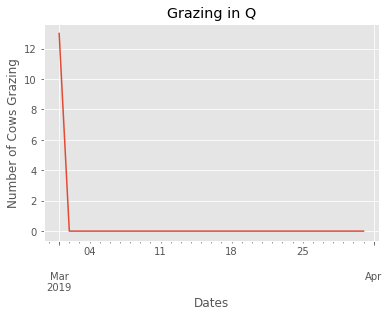

In [13]:
print_grazing(ab)

Which field do you want to plotW


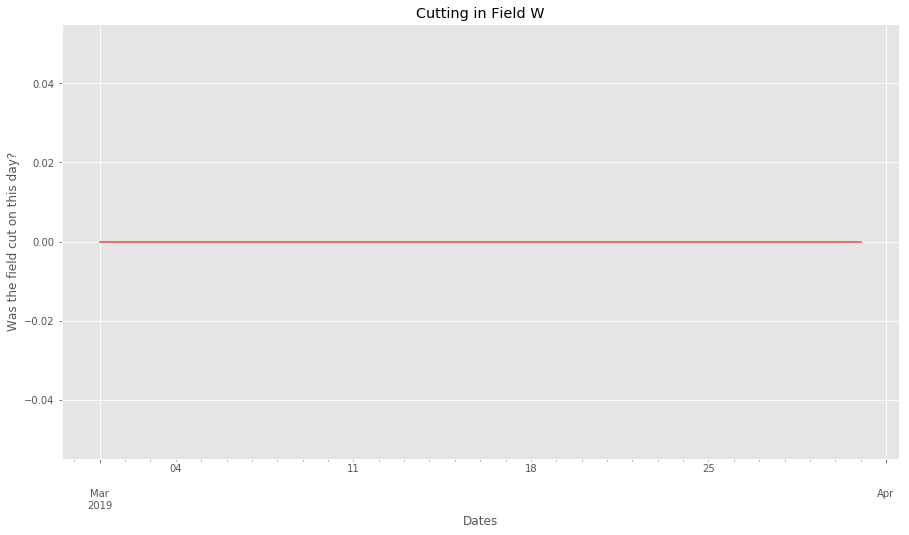

In [14]:
print_cutting(ab)

Which field do you want to plotE


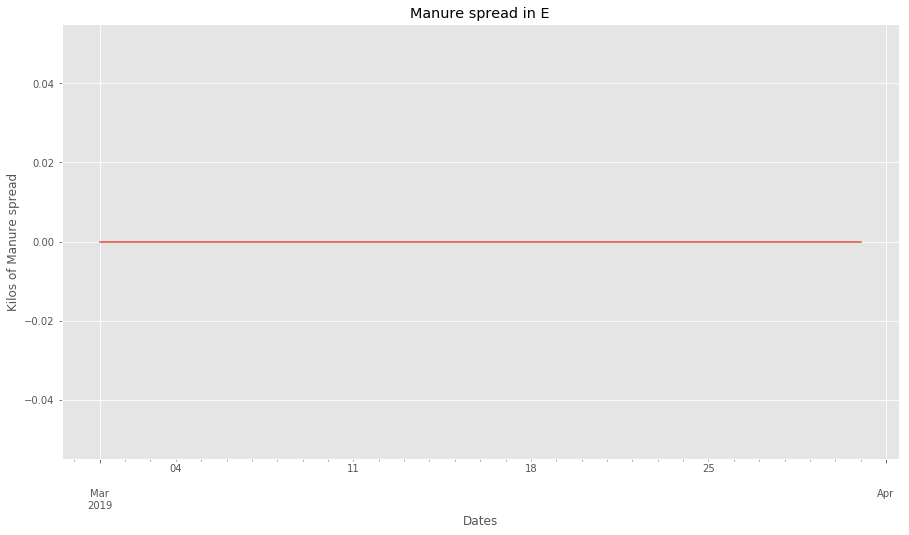

In [15]:
print_manure(ab)

# Back End
### Please run these cells before doing anything else in this notebook

In [1]:
# these are the libraries which has been used
import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt #will be used for plotting
import os 
from IPython.display import display

In [2]:
#Function that creates the buttons.
def display_buttons():
    button_input = widgets.Button(description="Input Data")  #These line of codes creates the buttons
    button_attributes = widgets.Button(description="Choose Attributes")
    button_export = widgets.Button(description="Export to Excel")
    button_graphs_grazing = widgets.Button(description="Graph Grazing")
    button_graphs_cutting = widgets.Button(description="Graph Cutting")
    button_graphs_manure = widgets.Button(description="Graph Manure")
    #These lines display the buttons
    display(button_input)
    display(button_attributes)
    display(button_export)
    display(button_graphs_grazing)
    display(button_graphs_cutting)
    display(button_graphs_manure)
    #display(button_graphs)

    #These lines connects a click on the button with the execution of the function
    button_input.on_click(input_data)
    button_attributes.on_click(choose_attributes)
    button_export.on_click(export_excel)
    button_graphs_grazing.on_click(print_grazing)
    button_graphs_cutting.on_click(print_cutting)
    button_graphs_manure.on_click(print_manure)

In [3]:
#This functions export will export the fields in a combined format that can be handed it to the government officials. 
# Find the results in the folder "Results"

ab = 1 #This might seem weird, and it is. To use the widget buttons the functions needed to have arguments for some reasons. 
#And by setting the argument to some random value it worked. 
def export_excel(ab): 
    pieces = dict(zip(list_farmnames_attributes, list_farms))
    result = pd.concat(pieces)
    writer = pd.ExcelWriter('Results/Farm_Data.xlsx', engine='xlsxwriter')
    result.to_excel(writer, sheet_name='The Fields')
    writer.save() 

In [4]:
#Input attributes of each field: size and type of grass. These attributes will be carried over to the Excel files.
def choose_attributes(ab): 
    global big_list_attributes #it was easier to make it global than to use "return" at the end of the function
    global list_farmnames_attributes 
    list_attributes = []
    big_list_attributes = []
    list_farmnames_attributes = []
    for i in list_farmnames:
        exec('{}_attributes = []'.format(i))

#take user input for size of each field and append to attribute list
    for i in list_farmnames:
        sizeinput = (input("Please enter the size of {} in square meters: ".format(i)))
        grassinput = (input("Please enter the tyep of grass in field {}. Enter either '1','2','3','4', or '5': ".format(i)))
        exec('{}_attributes.append(sizeinput)'.format(i))
        exec('{}_attributes.append(grassinput)'.format(i))
        big_list_attributes.append(sizeinput)
        big_list_attributes.append(grassinput)

    for i in range(len(list_farms)):
        for size in range(0,len(big_list_attributes),2):
            for type in range(1,len(big_list_attributes),2):
                aux = "Field:" + " " + list_farmnames[i] + "," + " " + "Size sqm:" + " " + big_list_attributes[size]+ ","+ " " + "Type of grass:" + " " + big_list_attributes[type] + "."
        list_farmnames_attributes.append(aux) 
        
        
        
        
        

In [ ]:
choose_attributes(ab)

In [17]:
list_farmnames_attributes

['Field: Q, Size sqm: 70, Type of grass: 3.',
 'Field: W, Size sqm: 70, Type of grass: 3.',
 'Field: E, Size sqm: 70, Type of grass: 3.']

In [19]:
big_list_attributes[0]

'50'

In [5]:
#Input data function here
#this function recieves input from the user and does it in a loop, so they can input as much as they want at anytime.
def input_data(ab):
    changecellinput = input("Do you wish to change a cell? Enter yes/no: ")
    while changecellinput in ['yes', 'Yes', 'YES', 'yES', 'yeS']:
        if changecellinput in ['no', 'No', 'NO', 'nO']:
            print ("Thank you, no cells will be changed")
        else:
            inputframe = input("What field would you like to change a cell in? Enter the name: ")
            inputdate = input("Enter the date you wish to change in the year-month-day format (ex: 2019-03-01): ")
            inputaction = input("Enter the action corresponding to the cell you wish to change (ex: Grazing): ")
            if inputaction in ["Grazing", "Manure", "Cutting"]:
                try:
                    inputchange = int(input("Enter what you wish to change the contents of the cell to: "))
                except ValueError:
                    print("Please input an actual number") 
                exec('{}.loc[inputdate,inputaction]=inputchange'.format(inputframe))
            else:
                print("Please enter an actual action")
                break
        exec("display({})".format(inputframe))
        print ("Thank you for entering data")
        continueinput = input("Do you wish to change another cell? Enter yes/no: ")
        if continueinput in ['no', 'No', 'NO', 'nO']:
            print ("You are done editing cells")
            return
    else:
        print ("You are done editing cells")

In [7]:
# Graphs

plt.style.use("ggplot")

def print_grazing(ab): 
    aux = dict(zip(list_farmnames, range(0,a)))
    aux1 = str(input("Which field do you want to plot"))
    choice = list_farms[aux[aux1]] 
    fig = plt.figure() 
    choice["Grazing"].plot(label = "Grazing in {}".format(choice.astype(str)), legend = False)
    plt.ylabel('Number of Cows Grazing')
    plt.rcParams['figure.figsize'] = [15,8] #size of the graphs
    plt.title("Grazing in {}".format(aux1)) #Main title

def print_cutting(ab): 
    aux = dict(zip(list_farmnames, range(0,a)))
    aux1 = str(input("Which field do you want to plot"))
    choice = list_farms[aux[aux1]]
    fig = plt.figure() 
    choice["Cutting"].plot(label = "Manure in {}".format(choice.astype(str)), legend = False)
    plt.ylabel('Was the field cut on this day?')
    plt.rcParams['figure.figsize'] = [15,8] #size of the graphs
    plt.title("Cutting in Field {}".format(aux1)) #Main title 
    
    
def print_manure(ab): 
    aux = dict(zip(list_farmnames, range(0,a)))
    aux1 = str(input("Which field do you want to plot"))
    choice = list_farms[aux[aux1]] 
    fig = plt.figure() 
    choice["Manure"].plot(label = "Manure in {}".format(choice.astype(str)), legend = False)
    plt.ylabel('Kilos of Manure spread')
    plt.rcParams['figure.figsize'] = [15,8] #size of the graphs
    plt.title("Manure spread in {}".format(aux1)) #Main title
    
    
    

# Appendix 
We wanted to use buttons to execute the functions. But, unfortunately that was not possible. When executing the buttons an output field was generetad (the buttons). The problem was that when we wanted to execute a function with a input() an EOF-error appeared. It was not possible to have both the widget buttons and an field for inputs at the same time. Thus, the only function working with the buttons is the export to excel function. 

Below you can see the idea we first had. 

In [9]:
display_buttons()

Button(description='Input Data', style=ButtonStyle())

Button(description='Choose Attributes', style=ButtonStyle())

Button(description='Export to Excel', style=ButtonStyle())

Button(description='Graph Grazing', style=ButtonStyle())

Button(description='Graph Cutting', style=ButtonStyle())

Button(description='Graph Manure', style=ButtonStyle())

In [8]:
#Function that creates the buttons.
def display_buttons():
    button_input = widgets.Button(description="Input Data")  #These line of codes creates the buttons
    button_attributes = widgets.Button(description="Choose Attributes")
    button_export = widgets.Button(description="Export to Excel")
    button_graphs_grazing = widgets.Button(description="Graph Grazing")
    button_graphs_cutting = widgets.Button(description="Graph Cutting")
    button_graphs_manure = widgets.Button(description="Graph Manure")
    #These lines display the buttons
    display(button_input)
    display(button_attributes)
    display(button_export)
    display(button_graphs_grazing)
    display(button_graphs_cutting)
    display(button_graphs_manure)
    #display(button_graphs)

    #These lines connects a click on the button with the execution of the function
    button_input.on_click(input_data)
    button_attributes.on_click(choose_attributes)
    button_export.on_click(export_excel)
    button_graphs_grazing.on_click(print_grazing)
    button_graphs_cutting.on_click(print_cutting)
    button_graphs_manure.on_click(print_manure)